<a href="https://colab.research.google.com/github/Misharosejoseph/Medical-insurance-cost-prediction-using-linear-regression/blob/main/Medical_insurance_cost_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the dependencies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data collection and analysis

In [5]:
#loading the data from csv file to panda dataframe
insurance_data=pd.read_csv("/content/insurance.csv")

In [6]:
#print first 5 rows of the dataframe
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
#no of rows and columns
insurance_data.shape

(1338, 7)

In [8]:
#getting some info about the dataset
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical features


*  sex
*   smoker
*   region









In [9]:
#checking null values
insurance_data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Data Analysis

In [10]:
#statistical measures of the dataset
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/tmp/ipython-input-1876179826.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['age'], color='skyblue') # Reverted to distplot and added color


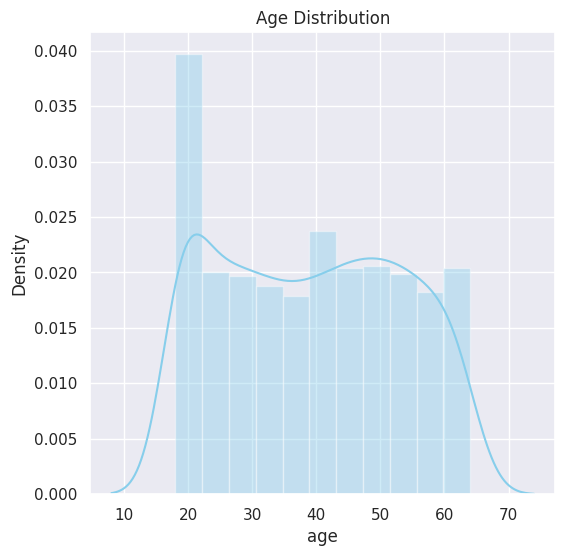

In [11]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['age'], color='skyblue') # Reverted to distplot and added color
plt.title('Age Distribution')
plt.show()

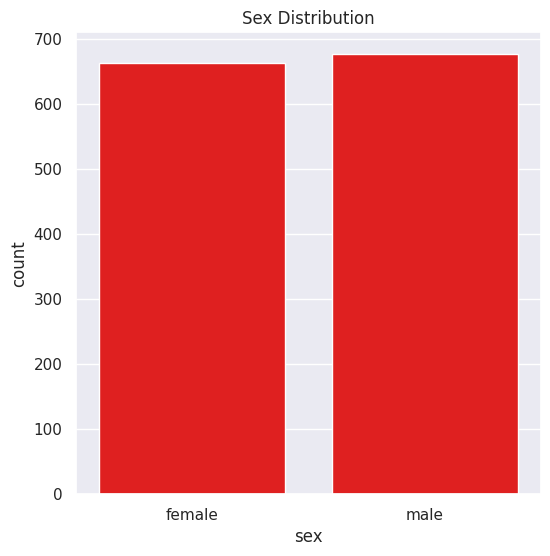

In [12]:
#gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_data,color='red')
plt.title('Sex Distribution')
plt.show()

In [13]:
insurance_data['sex'].value_counts()

,count
sex,
male,676
female,662


/tmp/ipython-input-283497759.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['bmi'], color='black') # Reverted to distplot and added color


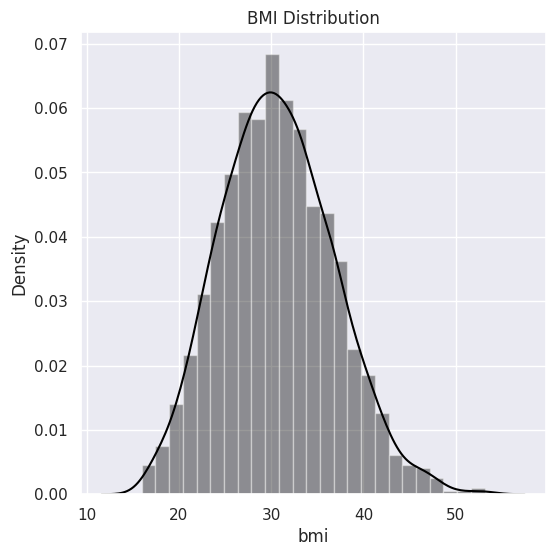

In [14]:
#bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['bmi'], color='black') # Reverted to distplot and added color
plt.title('BMI Distribution')
plt.show()

Normal bmi range:18.5 to 24.9

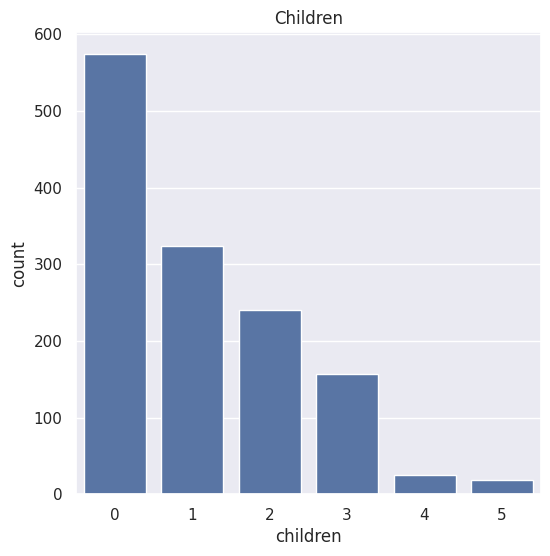

In [15]:
#children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_data)
plt.title('Children')
plt.show()

In [16]:
insurance_data['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


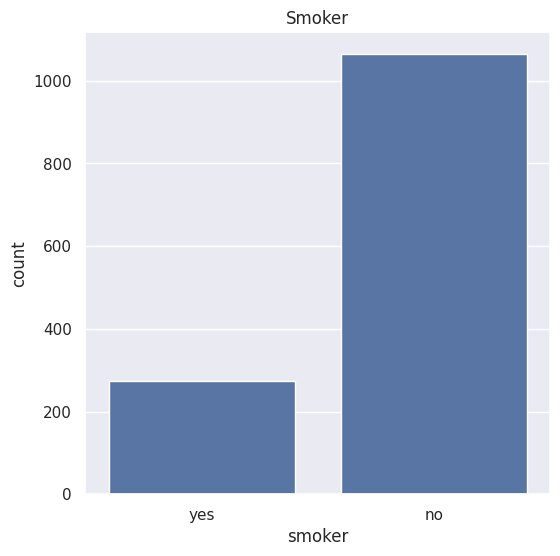

In [17]:
#smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_data)
plt.title('Smoker')
plt.show()

In [18]:
insurance_data['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


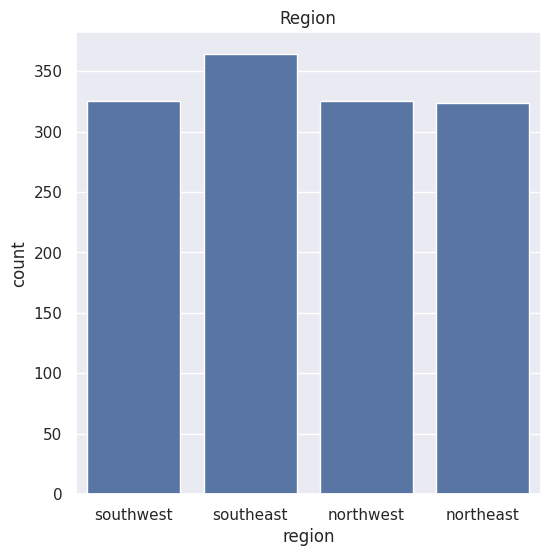

In [19]:
#region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_data)
plt.title('Region')
plt.show()

In [20]:
insurance_data['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


/tmp/ipython-input-1457599261.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['charges'], color='green') # Reverted to distplot and added color


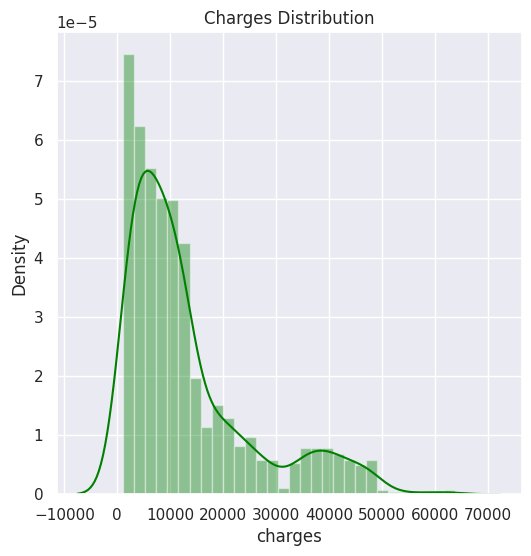

In [21]:
#distribution of charges value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_data['charges'], color='green') # Reverted to distplot and added color
plt.title('Charges Distribution')
plt.show()

Data preprocessing

Encoding the categorical features

In [29]:
#encoding sex column
insurance_data.replace({'sex':{'male':0,'female':1}}, inplace=True)


In [30]:
#encoding smoker column
insurance_data.replace({'smoker':{'yes':0,'no':1}}, inplace=True)



In [31]:
#encoding region column
insurance_data.replace({'region':{'southwest':0,'southeast':1,'northwest':2,'northeast':3}}, inplace=True)

In [33]:
insurance_data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,0,16884.92400
1,18,0,33.770,1,1,1,1725.55230
2,28,0,33.000,3,1,1,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


Splitting the features and target

In [34]:
x = insurance_data.drop(columns='charges', axis=1)
y = insurance_data['charges']

In [35]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       0
1      18    0  33.770         1       1       1
2      28    0  33.000         3       1       1
3      33    0  22.705         0       1       2
4      32    0  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       2
1334   18    1  31.920         0       1       3
1335   18    1  36.850         0       1       1
1336   21    1  25.800         0       1       0
1337   61    1  29.070         0       0       2

[1338 rows x 6 columns]


In [36]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Spliting the data into training and testing data

In [37]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.2,random_state=2)

In [38]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear regression

In [39]:
#loading the linear regression model
regressor = LinearRegression()

In [40]:
regressor.fit(x_train,y_train)

LinearRegression()

Model Evaluation

In [41]:
#predition on training data
training_data_predition = regressor.predict(x_train)

In [43]:
# R square value
r2_train = metrics.r2_score(y_train,training_data_predition)
print('R square value:',r2_train)

R square value: 0.7519923667088932


In [44]:
#predition on testing data
test_data_predition = regressor.predict(x_test)

In [45]:
# R square value
r2_test = metrics.r2_score(y_test,test_data_predition)
print('R square value:',r2_test)

R square value: 0.7445422986536503


Building a preditive system

In [47]:
input_data =(31,1,25.74,0,1,0)
#changing input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print(prediction)
print('The insurance cost is USD',prediction[0])

[3587.82055864]
[3587.82055864]
The insurance cost is USD 3587.820558639951


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
